In [ ]:
import kagglehub
import pandas as pd
import os
from scipy.stats import skew, kurtosis
import seaborn as sns
from google.colab import drive

------


#Working with traffic Data

##downloading Q1 (jan,feb,mar) datasets tarffic

In [ ]:
#===================jan 2020==============================#
dataset_path = kagglehub.dataset_download("baycelik/traffic-density-january-2020-dataset")
file_name = os.listdir(dataset_path)[0]  # Get the single file in the folder
file_path = os.path.join(dataset_path, file_name)
df1 = pd.read_csv(file_path)

100%|██████████| 20.4M/20.4M [00:00<00:00, 43.2MB/s]

Extracting files...


In [ ]:
#===================feb 2020==============================#

dataset_path = kagglehub.dataset_download("baycelik/traffic-density-february-2020-dataset")
file_name = os.listdir(dataset_path)[0]  # Get the single file in the folder
file_path = os.path.join(dataset_path, file_name)
df2 = pd.read_csv(file_path)

100%|██████████| 18.9M/18.9M [00:00<00:00, 59.9MB/s]

Extracting files...


In [ ]:
#===================mar 2020==============================#

dataset_path = kagglehub.dataset_download("baycelik/traffic-density-march-2020-dataset")
file_name = os.listdir(dataset_path)[0]  # Get the single file in the folder
file_path = os.path.join(dataset_path, file_name)
df3 = pd.read_csv(file_path)

100%|██████████| 20.1M/20.1M [00:00<00:00, 76.1MB/s]

Extracting files...


##Merging data sets in q1 and aggregate it

In [ ]:
q1 = pd.concat([df1, df2, df3], ignore_index=True)
q1.shape

(3877785, 8)

In [ ]:
q1['DATE_TIME'] = pd.to_datetime(q1['DATE_TIME'])

# Add 'Month' column
q1_agg = q1.groupby('GEOHASH')[['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES']].mean().reset_index()

print(q1_agg )



     GEOHASH  MINIMUM_SPEED  MAXIMUM_SPEED  AVERAGE_SPEED  NUMBER_OF_VEHICLES
0     sx7chk      58.936690     122.015256      85.778795           16.128146
1     sx7chm      33.983343     117.373126      75.659078           23.617990
2     sx7cht       8.505625      90.103612      41.819420           20.813499
3     sx7chw      30.224843     113.778302      70.679245           27.572851
4     sx7chx      25.108122     120.926539      74.288670           28.242628
...      ...            ...            ...            ...                 ...
2299  sxm41s      43.315789     101.815789      70.907895           12.539474
2300  sxm41u      23.171429      90.857143      56.171429           12.342857
2301  sxm445      56.000000     100.666667      73.333333           11.333333
2302  sxm44h      35.333333      90.000000      64.666667           11.000000
2303  sxm44k      23.100000      89.850000      53.350000           11.600000

[2304 rows x 5 columns]


In [ ]:
#getting lat and long back
q1_agg = q1.groupby('GEOHASH').agg({
    'LONGITUDE': 'first',  # Take the first longitude for each GEOHASH
    'LATITUDE': 'first',   # Take the first latitude for each GEOHASH
    'MINIMUM_SPEED': 'mean',
    'MAXIMUM_SPEED': 'mean',
    'AVERAGE_SPEED': 'mean',
    'NUMBER_OF_VEHICLES': 'mean'
}).reset_index()

print(q1_agg)


     GEOHASH  LONGITUDE   LATITUDE  MINIMUM_SPEED  MAXIMUM_SPEED  \
0     sx7chk  27.965698  40.981750      58.936690     122.015256   
1     sx7chm  27.965698  40.987244      33.983343     117.373126   
2     sx7cht  27.976685  40.987244       8.505625      90.103612   
3     sx7chw  27.976685  40.992737      30.224843     113.778302   
4     sx7chx  27.976685  40.998230      25.108122     120.926539   
...      ...        ...        ...            ...            ...   
2299  sxm41s  29.602661  41.157532      43.315789     101.815789   
2300  sxm41u  29.613647  41.157532      23.171429      90.857143   
2301  sxm445  29.624634  41.152039      56.000000     100.666667   
2302  sxm44h  29.624634  41.157532      35.333333      90.000000   
2303  sxm44k  29.635620  41.157532      23.100000      89.850000   

      AVERAGE_SPEED  NUMBER_OF_VEHICLES  
0         85.778795           16.128146  
1         75.659078           23.617990  
2         41.819420           20.813499  
3         70.67

In [ ]:
# q1_agg.columns
q1_Gll= q1_agg[['GEOHASH','LATITUDE', 'LONGITUDE']]
q1_Gll

,GEOHASH,LATITUDE,LONGITUDE
0,sx7chk,40.981750,27.965698
1,sx7chm,40.987244,27.965698
2,sx7cht,40.987244,27.976685
3,sx7chw,40.992737,27.976685
4,sx7chx,40.998230,27.976685
...,...,...,...
2299,sxm41s,41.157532,29.602661
2300,sxm41u,41.157532,29.613647
2301,sxm445,41.152039,29.624634
2302,sxm44h,41.157532,29.624634


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the output path in your Google Drive
output_path = "/content/drive/MyDrive/dataAnalysis_dataset/output/Turkey_traffic_filtered.csv"

# Save the final dataset to CSV
q1_agg.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")

Mounted at /content/drive
Dataset saved to /content/drive/MyDrive/dataAnalysis_dataset/output/Turkey_traffic_filtered.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traffic_filtered = pd.read_csv("/content/drive/MyDrive/dataAnalysis_dataset/output/Turkey_traffic_filtered.csv")
print(traffic_filtered.head())

  GEOHASH  LONGITUDE   LATITUDE  MINIMUM_SPEED  MAXIMUM_SPEED  AVERAGE_SPEED  \
0  sx7chk  27.965698  40.981750      58.936690     122.015256      85.778795   
1  sx7chm  27.965698  40.987244      33.983343     117.373126      75.659078   
2  sx7cht  27.976685  40.987244       8.505625      90.103612      41.819420   
3  sx7chw  27.976685  40.992737      30.224843     113.778302      70.679245   
4  sx7chx  27.976685  40.998230      25.108122     120.926539      74.288670   

   NUMBER_OF_VEHICLES  
0           16.128146  
1           23.617990  
2           20.813499  
3           27.572851  
4           28.242628  


In [ ]:
traffic_filtered.size

16128

In [ ]:
# Check the columns and data types
print(traffic_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GEOHASH             2304 non-null   object 
 1   LONGITUDE           2304 non-null   float64
 2   LATITUDE            2304 non-null   float64
 3   MINIMUM_SPEED       2304 non-null   float64
 4   MAXIMUM_SPEED       2304 non-null   float64
 5   AVERAGE_SPEED       2304 non-null   float64
 6   NUMBER_OF_VEHICLES  2304 non-null   float64
dtypes: float64(6), object(1)
memory usage: 126.1+ KB
None


In [ ]:
traffic_filtered.isnull().sum()

,0
GEOHASH,0
LONGITUDE,0
LATITUDE,0
MINIMUM_SPEED,0
MAXIMUM_SPEED,0
AVERAGE_SPEED,0
NUMBER_OF_VEHICLES,0


In [ ]:
# Get a summary of numerical columns
print(traffic_filtered.describe())


         LONGITUDE     LATITUDE  MINIMUM_SPEED  MAXIMUM_SPEED  AVERAGE_SPEED  \
count  2304.000000  2304.000000    2304.000000    2304.000000    2304.000000   
mean     28.878880    41.065609      23.928628      98.692749      56.335895   
std       0.354894     0.098943      19.635501      30.024679      22.688873   
min      27.965698    40.767517       5.960674      11.000000       7.000000   
25%      28.690796    41.003723       7.205501      73.352642      35.297219   
50%      28.932495    41.058655      12.793492     102.441858      56.509788   
75%      29.130249    41.135559      41.230641     124.044730      77.547326   
max      29.635620    41.344299      83.097484     155.279183     108.861635   

       NUMBER_OF_VEHICLES  
count         2304.000000  
mean            77.237067  
std             78.071270  
min             11.000000  
25%             23.468165  
50%             50.532054  
75%             99.357557  
max            566.651872  


<Axes: >

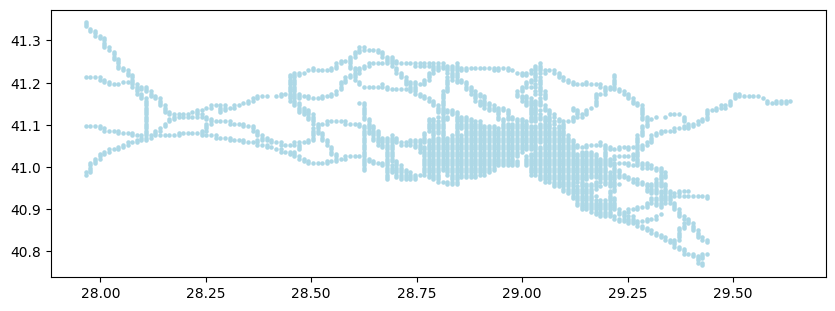

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create geometry column using longitude and latitude
traffic_filtered['geometry'] = traffic_filtered.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)

# Create a GeoDataFrame
gdf_filtered = gpd.GeoDataFrame(traffic_filtered, geometry='geometry')

# Plot the data on a simple map
gdf_filtered.plot(figsize=(10, 6), color='lightblue', markersize=5)


In [ ]:
traffic_filtered['geometry']

,geometry
0,POINT (27.9656982421875 40.9817504882812)
1,POINT (27.9656982421875 40.9872436523438)
2,POINT (27.9766845703125 40.9872436523438)
3,POINT (27.9766845703125 40.9927368164062)
4,POINT (27.9766845703125 40.9982299804688)
...,...
2299,POINT (29.6026611328125 41.1575317382812)
2300,POINT (29.6136474609375 41.1575317382812)
2301,POINT (29.6246337890625 41.1520385742188)
2302,POINT (29.6246337890625 41.1575317382812)


In [ ]:
traffic_filtered

,GEOHASH,LONGITUDE,LATITUDE,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,geometry
0,sx7chk,27.965698,40.981750,58.936690,122.015256,85.778795,16.128146,POINT (27.9656982421875 40.9817504882812)
1,sx7chm,27.965698,40.987244,33.983343,117.373126,75.659078,23.617990,POINT (27.9656982421875 40.9872436523438)
2,sx7cht,27.976685,40.987244,8.505625,90.103612,41.819420,20.813499,POINT (27.9766845703125 40.9872436523438)
3,sx7chw,27.976685,40.992737,30.224843,113.778302,70.679245,27.572851,POINT (27.9766845703125 40.9927368164062)
4,sx7chx,27.976685,40.998230,25.108122,120.926539,74.288670,28.242628,POINT (27.9766845703125 40.9982299804688)
...,...,...,...,...,...,...,...,...
2299,sxm41s,29.602661,41.157532,43.315789,101.815789,70.907895,12.539474,POINT (29.6026611328125 41.1575317382812)
2300,sxm41u,29.613647,41.157532,23.171429,90.857143,56.171429,12.342857,POINT (29.6136474609375 41.1575317382812)
2301,sxm445,29.624634,41.152039,56.000000,100.666667,73.333333,11.333333,POINT (29.6246337890625 41.1520385742188)
2302,sxm44h,29.624634,41.157532,35.333333,90.000000,64.666667,11.000000,POINT (29.6246337890625 41.1575317382812)


     index_right  NUMBER_OF_VEHICLES  \
402       4142.0          460.663506   
419       4263.0          440.448139   
428       4315.0          422.965004   
442       4379.0          517.690187   
452       4437.0          437.727887   

                                              geometry    area  \
402  POLYGON ((28.0207 41.30252, 28.0307 41.30252, ...  0.0001   
419  POLYGON ((28.0307 40.89252, 28.0407 40.89252, ...  0.0001   
428  POLYGON ((28.0307 40.98252, 28.0407 40.98252, ...  0.0001   
442  POLYGON ((28.0307 41.12252, 28.0407 41.12252, ...  0.0001   
452  POLYGON ((28.0307 41.22252, 28.0407 41.22252, ...  0.0001   

     traffic_density  
402     4.606635e+06  
419     4.404481e+06  
428     4.229650e+06  
442     5.176902e+06  
452     4.377279e+06  


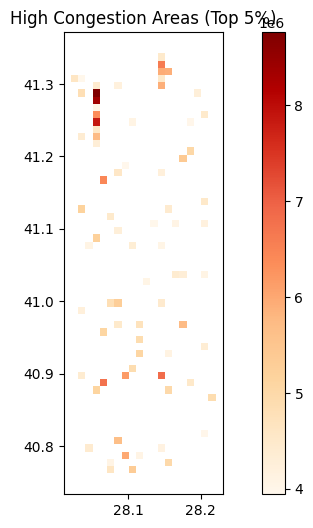

In [ ]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

# Step 1: Create a grid over your study area (using the bounding box of the traffic data)
minx, miny, maxx, maxy = gdf_filtered.total_bounds  # Fixed the error here
cell_size = 0.01  # Define the size of each grid cell (in degrees, adjust based on your area)

# Create a grid of squares (each grid cell will have a size of 'cell_size' x 'cell_size')
x_coords = np.arange(minx, maxx, cell_size)
y_coords = np.arange(miny, maxy, cell_size)

# Create grid cells (rectangles) based on the coordinates
grid_cells = []
for x in x_coords:
    for y in y_coords:
        grid_cells.append(((x, y, x + cell_size, y + cell_size)))

# Convert grid cells into GeoDataFrame
grid_polygons = [Point(x, y).buffer(cell_size / 2).envelope for x, y, _, _ in grid_cells]
grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons)

# Step 2: Convert traffic data into GeoDataFrame if it's not already
gdf_filtered['geometry'] = gdf_filtered.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf_traffic = gpd.GeoDataFrame(gdf_filtered, geometry='geometry')

# Step 3: Spatial Join to count the number of vehicles in each grid cell
gdf_traffic_within_grid = gpd.sjoin(gdf_traffic, grid_gdf, how='left', predicate='within')

# Step 4: Aggregate the traffic data by grid cell
# Sum the number of vehicles for each grid cell
grid_aggregated = gdf_traffic_within_grid.groupby(gdf_traffic_within_grid.index_right).agg({
    'NUMBER_OF_VEHICLES': 'sum'
}).reset_index()

# Add the grid's geometry (each grid cell's polygon)
grid_aggregated['geometry'] = grid_gdf.geometry

# Convert to GeoDataFrame
grid_aggregated_gdf = gpd.GeoDataFrame(grid_aggregated, geometry='geometry')

# Step 5: Calculate Traffic Density (vehicles per unit area)
# Assuming grid size is cell_size * cell_size, we can calculate the area of each grid cell
grid_aggregated_gdf['area'] = grid_aggregated_gdf.geometry.area
grid_aggregated_gdf['traffic_density'] = grid_aggregated_gdf['NUMBER_OF_VEHICLES'] / grid_aggregated_gdf['area']

# Step 6: Identify High-Congestion Areas
# Set a threshold for high-congestion (e.g., traffic density above a certain value)
high_congestion_threshold = grid_aggregated_gdf['traffic_density'].quantile(0.95)  # Top 5% areas

# Filter high-congestion areas
high_congestion_areas = grid_aggregated_gdf[grid_aggregated_gdf['traffic_density'] > high_congestion_threshold]

# Step 7: Visualize the high-congestion areas
ax = high_congestion_areas.plot(column='traffic_density', cmap='OrRd', figsize=(10, 6), legend=True)
ax.set_title("High Congestion Areas (Top 5%)")


# Display the result
print(high_congestion_areas.head())


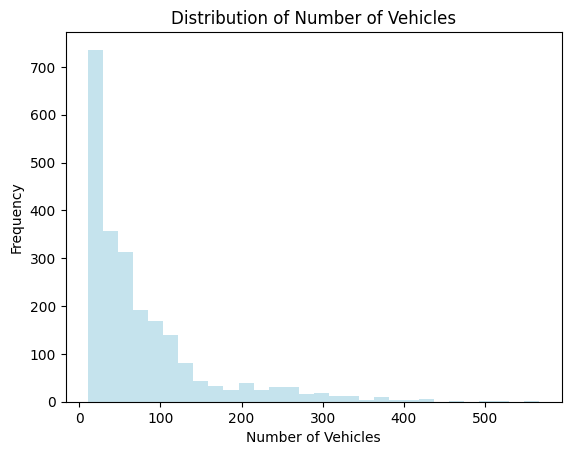

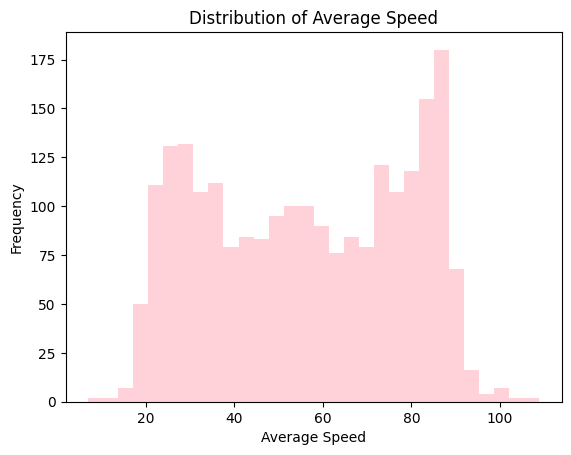

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for 'NUMBER_OF_VEHICLES' and 'AVERAGE_SPEED'
traffic_filtered['NUMBER_OF_VEHICLES'].plot(kind='hist', bins=30, color='lightblue', alpha=0.7)
plt.title('Distribution of Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.show()

traffic_filtered['AVERAGE_SPEED'].plot(kind='hist', bins=30, color='pink', alpha=0.7)
plt.title('Distribution of Average Speed')
plt.xlabel('Average Speed')
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to speed columns (to avoid negative values)
speed_columns = ['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED']
scaler = MinMaxScaler()

# Scale the speed columns to range between 0 and 1
traffic_filtered[speed_columns] = scaler.fit_transform(traffic_filtered[speed_columns])

# Apply log transformation to NUMBER_OF_VEHICLES
traffic_filtered['NUMBER_OF_VEHICLES'] = np.log1p(traffic_filtered['NUMBER_OF_VEHICLES'])

# Display the normalized data
print(traffic_filtered.head())


  GEOHASH  LONGITUDE   LATITUDE  MINIMUM_SPEED  MAXIMUM_SPEED  AVERAGE_SPEED  \
0  sx7chk  27.965698  40.981750       0.686780       0.769447       0.773390   
1  sx7chm  27.965698  40.987244       0.363285       0.737273       0.674043   
2  sx7cht  27.976685  40.987244       0.032993       0.548268       0.341831   
3  sx7chw  27.976685  40.992737       0.314560       0.712357       0.625154   
4  sx7chx  27.976685  40.998230       0.248227       0.761902       0.660589   

   NUMBER_OF_VEHICLES                                   geometry  
0            2.840723  POINT (27.9656982421875 40.9817504882812)  
1            3.203477  POINT (27.9656982421875 40.9872436523438)  
2            3.082529  POINT (27.9766845703125 40.9872436523438)  
3            3.352457  POINT (27.9766845703125 40.9927368164062)  
4            3.375628  POINT (27.9766845703125 40.9982299804688)  


In [ ]:
# Print the column names of the DataFrame
print(traffic_filtered.columns)


Index(['GEOHASH', 'LONGITUDE', 'LATITUDE', 'MINIMUM_SPEED', 'MAXIMUM_SPEED',
       'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES', 'geometry'],
      dtype='object')


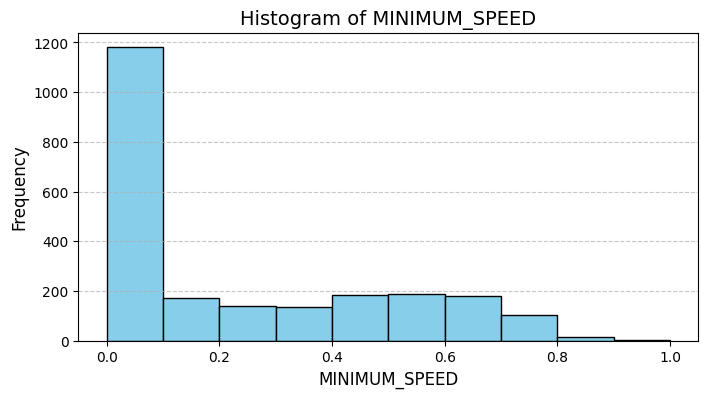

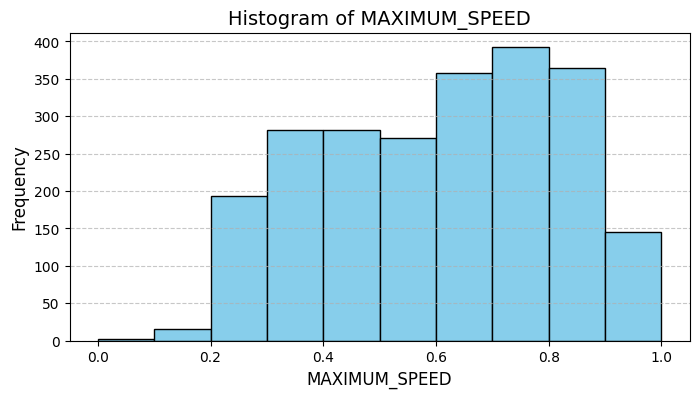

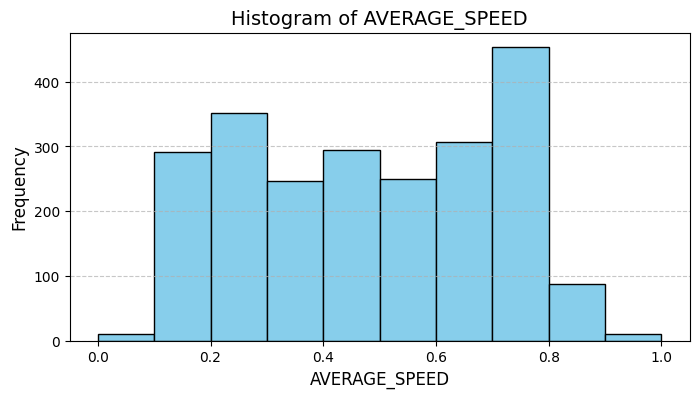

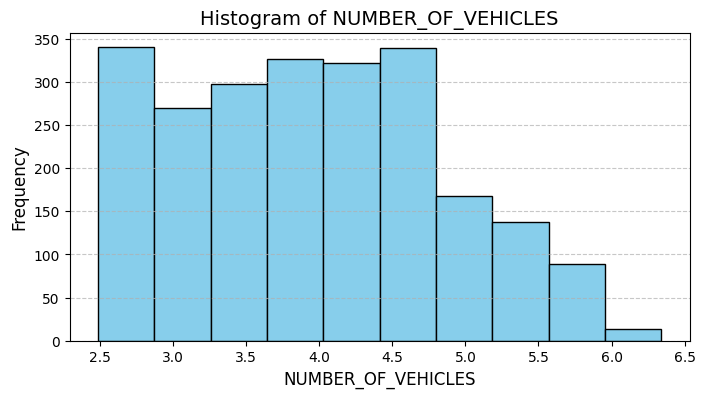

In [ ]:
# List of numeric columns
numeric_columns = ['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES']

# Loop through numeric columns to create histograms
for column in numeric_columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    traffic_filtered[column].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


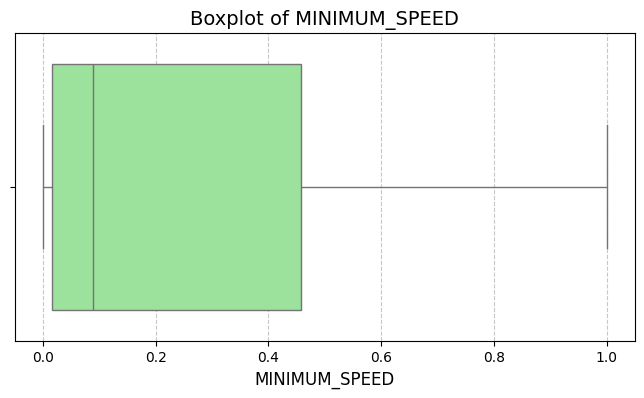

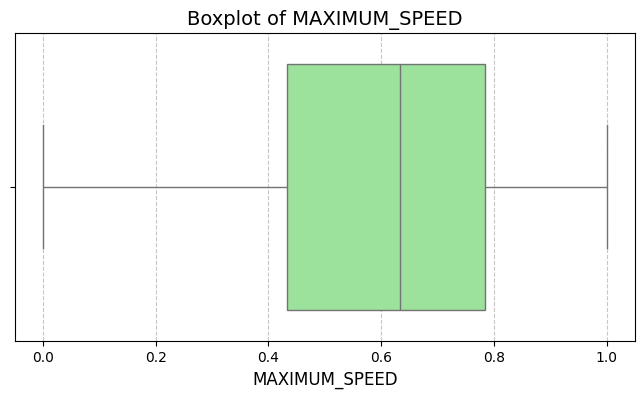

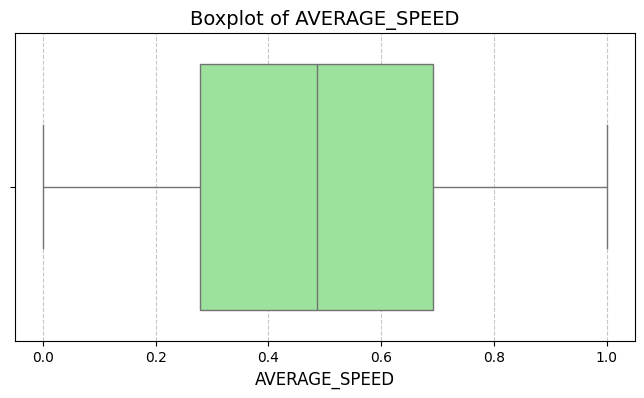

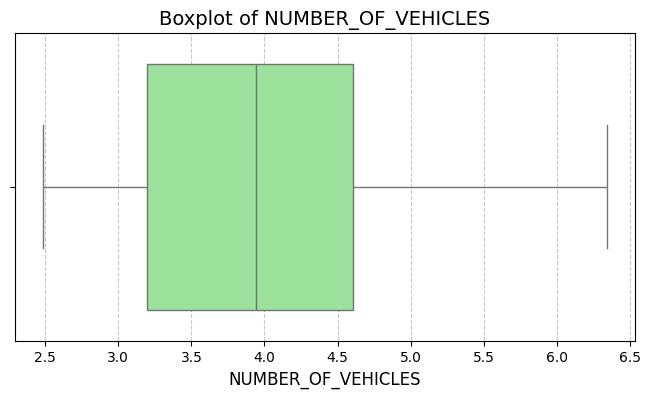

In [ ]:
import seaborn as sns

# List of numeric columns
numeric_columns = ['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES']

# Loop through numeric columns to create boxplots
for column in numeric_columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.boxplot(x=traffic_filtered[column], color='lightgreen')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-25-17cbe77f61d8>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_filtered[col], ax=axes[i], shade=True)
<ipython-input-25-17cbe77f61d8>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_filtered[col], ax=axes[i], shade=True)
<ipython-input-25-17cbe77f61d8>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_filtered[col], ax=axes[i], shade=True)
<ipython-input-25-17cbe77f61d8>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(traffic_filtered[col], ax=axes[i], 

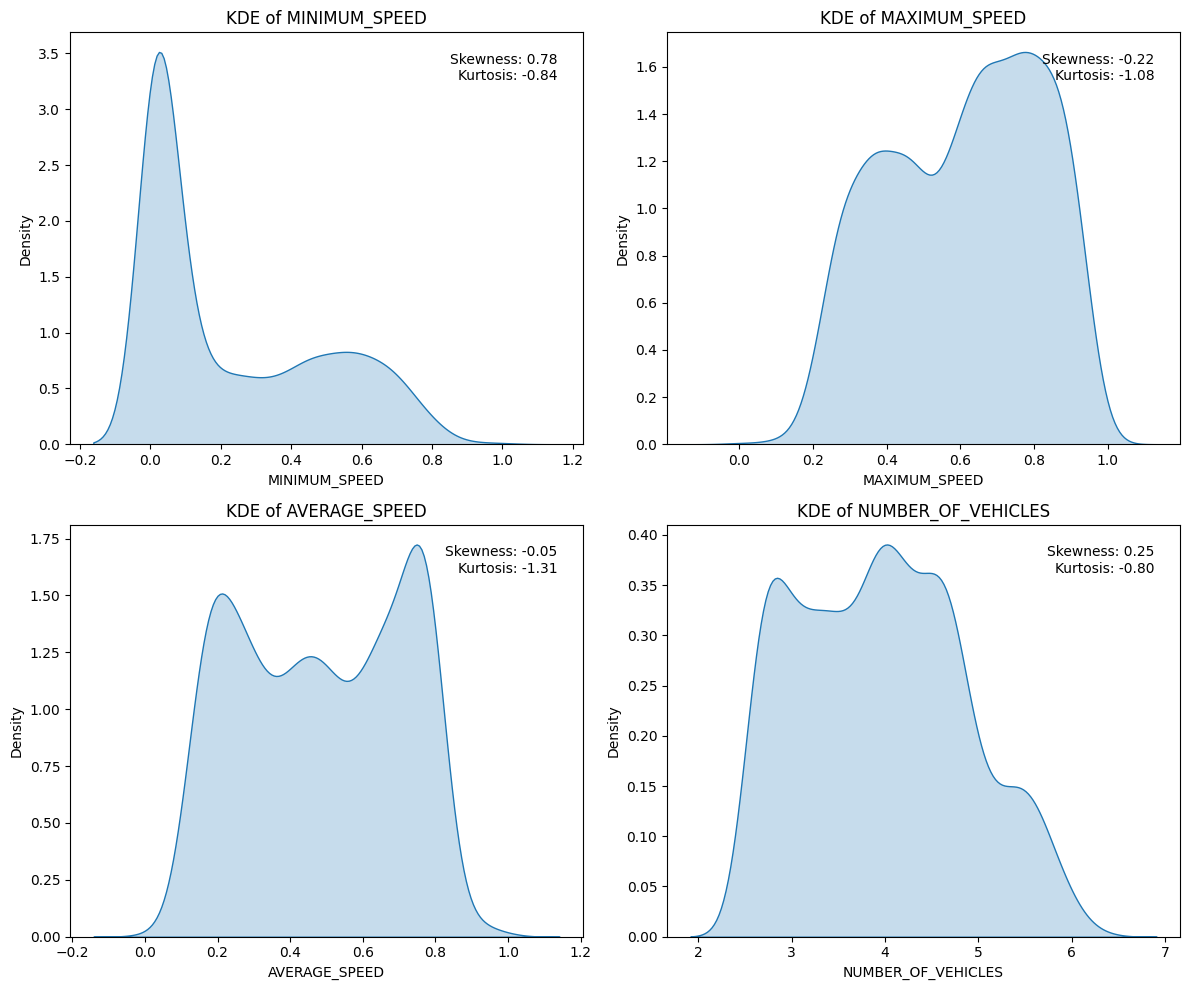

In [ ]:
import seaborn as sns

# For 'MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', and 'NUMBER_OF_VEHICLES'
columns_to_check = ['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES']

# Initialize the plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten to make it easier to iterate over

# Loop through columns to create KDE plots
for i, col in enumerate(columns_to_check):
    # Plot KDE
    sns.kdeplot(traffic_filtered[col], ax=axes[i], shade=True)
    axes[i].set_title(f"KDE of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

    # Calculate and display skewness and kurtosis
    skew_val = skew(traffic_filtered[col])
    kurtosis_val = kurtosis(traffic_filtered[col])
    axes[i].text(0.95, 0.95, f'Skewness: {skew_val:.2f}\nKurtosis: {kurtosis_val:.2f}',
                 transform=axes[i].transAxes, ha='right', va='top', fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:
# Skewness and Kurtosis for Speed and Vehicle Count columns

# For 'MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', and 'NUMBER_OF_VEHICLES'
columns_to_check = ['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES']

# Initialize an empty dictionary to store results
skewness_dict = {}
kurtosis_dict = {}

# Loop through the columns and calculate skewness and kurtosis
for col in columns_to_check:
    skewness_dict[col] = skew(traffic_filtered[col])
    kurtosis_dict[col] = kurtosis(traffic_filtered[col])

# Display results
for col in columns_to_check:
    print(f"{col} - Skewness: {skewness_dict[col]}, Kurtosis: {kurtosis_dict[col]}")



MINIMUM_SPEED - Skewness: 0.7804071502378379, Kurtosis: -0.843401134812805
MAXIMUM_SPEED - Skewness: -0.22147769503008718, Kurtosis: -1.0766182275620773
AVERAGE_SPEED - Skewness: -0.04538922715384126, Kurtosis: -1.3110126557445807
NUMBER_OF_VEHICLES - Skewness: 0.25424303041803, Kurtosis: -0.80267029918594


In [ ]:
import folium
from folium.plugins import HeatMap

# Step 1: Prepare heatmap data
heatmap_data = [
    [row['LATITUDE'], row['LONGITUDE'], row['NUMBER_OF_VEHICLES']]
    for _, row in traffic_filtered.iterrows()
    if not pd.isna(row['LATITUDE']) and not pd.isna(row['LONGITUDE']) and not pd.isna(row['NUMBER_OF_VEHICLES'])
]

# Step 2: Create a Folium map centered on Turkey
map_turkey_traffic = folium.Map(location=[39.0, 35.0], zoom_start=6)

# Step 3: Add HeatMap layer
HeatMap(heatmap_data, radius=15, blur=10, max_zoom=12).add_to(map_turkey_traffic)

# Step 4: Save and display the map
map_turkey_traffic.save('turkey_traffic_heatmap.html')
map_turkey_traffic


To gain a deeper understanding of the distribution and explore further:

Visualize the Data: Plot histograms, boxplots, and KDE plots for each of the columns to visually confirm these insights and identify any outliers or unusual patterns.
Skewness: Check the skewness and kurtosis for each of the speed and vehicle count columns to understand how much they deviate from a normal distribution.
Geospatial Analysis: Plotting the data geographically on a map (using latitude and longitude) could provide insights into areas with unusually high traffic, which might be critical for congestion analysis.